качаем библиотеки

In [36]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [37]:
### для загрузки данных
with open(r'/Users/alikhansainov/Desktop/Python/AC/AC/f679079d4ee2fe0060716778a66602bd.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [38]:
mean = np.mean(product1)
print (mean)

mean2 = np.mean(product2)
print (mean2)
print(np.median(product1))
print(np.median(product2))
print(statistics.mode(product1))
print(statistics.mode(product2))


199.103
193.5
198.5
194.5
186
227


Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

In [39]:
# когда генеральная совокупность данных увеличивается мода становится менее показательной
# на основе двух оставшихся метрик продук1 в среднем приносит больше выручки

**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [40]:
std_dev = np.std(product1)
std_dev2 = np.std(product2)
print (std_dev)
print (std_dev2)
# оценка продукта 1 является более точнее чем продукта 2 так как имеет меньшее стандартное отклонение

28.793964489107783
29.589018233121557


**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

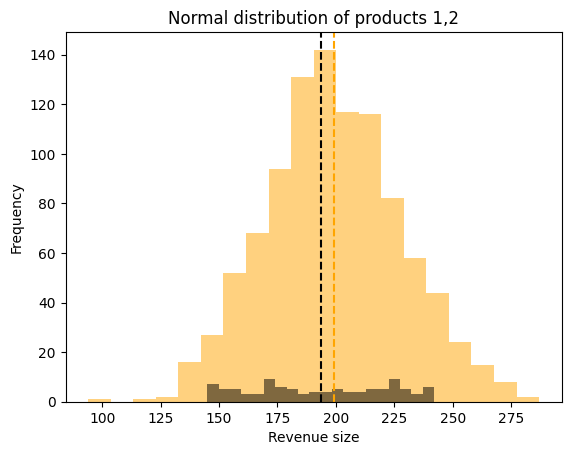

In [41]:

product1hist = plt.hist(product1, color='orange', bins=20, alpha=0.5, label='Product1')
product2hist = plt.hist(product2, color='black', bins=20, alpha=0.5, label='Product2')
plt.axvline(mean, color='orange',linestyle='--')
plt.axvline(mean2, color='black',linestyle='--')
plt.title('Normal distribution of products 1,2')
plt.xlabel('Revenue size')
plt.ylabel('Frequency')
plt.show()

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [42]:
range1 = np.ptp(product1)
range2 = np.ptp(product2)
print(range1)
print(range2)
print (std_dev)
print (std_dev2)
# размах первого продукта намного больше чем размах второго, в то время как стандартное отклонение первого продукта меньше чем 
# второго продукта. Дело в том что размах разница между мин-м и макси-м значениями в то время как станд отклонение это отклонение 
# всех значений данных относительно их среднего значения 
# стандартное отклонение более чувствительно к выбросам и более информативно о характере распределения данных.


193
97
28.793964489107783
29.589018233121557


**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [43]:
# delete outliers

print(f'IQR выручки продукта1:  {np.percentile(product1, 75) - np.percentile(product1, 25)}')
print(f'IQR выручки продукта2:  {np.percentile(product2, 75) - np.percentile(product2, 25)}')

Q1_product1 = np.percentile(product1, 25)
Q3_product1 = np.percentile(product1, 75)
Q1_product2 = np.percentile(product2, 25)
Q3_product2 = np.percentile(product2, 75)

IQR_product1 = Q3_product1 - Q1_product1
IQR_product2 = Q3_product2 - Q1_product2

# Определение границ усов
lower_bound_product1 = Q1_product1 - 1.5 * IQR_product1
upper_bound_product1 = Q3_product1 + 1.5 * IQR_product1

lower_bound_product2 = Q1_product2 - 1.5 * IQR_product2
upper_bound_product2 = Q3_product2 + 1.5 * IQR_product2

# Удаление выбросов
product1_filtered = [x for x in product1 if lower_bound_product1 <= x <= upper_bound_product1]
product2_filtered = [x for x in product2 if lower_bound_product2 <= x <= upper_bound_product2]

# Вывод количества удаленных выбросов
outliers_product1 = len(product1) - len(product1_filtered)
outliers_product2 = len(product2) - len(product2_filtered)
print("Удаленные выбросов для продукта1:", outliers_product1)
print("Удаленные выбросов для продукта2:", outliers_product2)


# У продукта 1 имеются 4 выброса что может говорить об ошибках в измерения данных 
# Такие выбросы могут искажать статистики распределения, такие как размах
# После удаления данных межквартильный размах может изменится и стать более репрезентативным 

IQR выручки продукта1:  38.25
IQR выручки продукта2:  51.0
Удаленные выбросов для продукта1: 4
Удаленные выбросов для продукта2: 0


**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

Начало выбросов: 121.625
Конец выбросов: 274.625


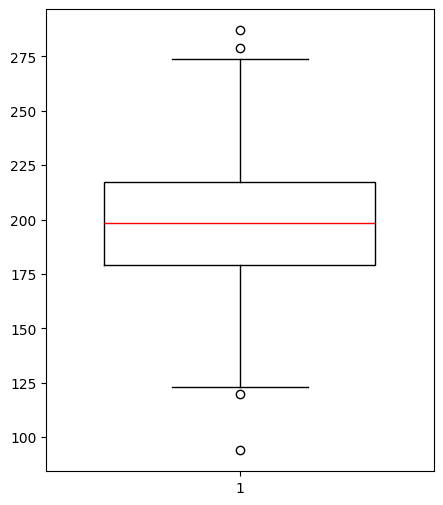

In [44]:
# Визуализация boxplot в вертикальном положении
plt.figure(figsize=(5, 6))
plt.boxplot(product1, vert=True, widths=0.7, patch_artist=False, medianprops={'color':'red'})
lower_bound = Q1_product1 - 1.5 * IQR_product1
upper_bound = Q3_product1 + 1.5 * IQR_product1
print("Начало выбросов:", lower_bound)
print("Конец выбросов:", upper_bound)
plt.show()

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

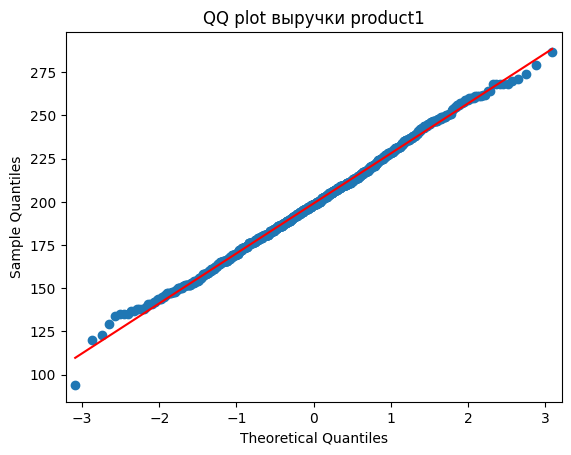

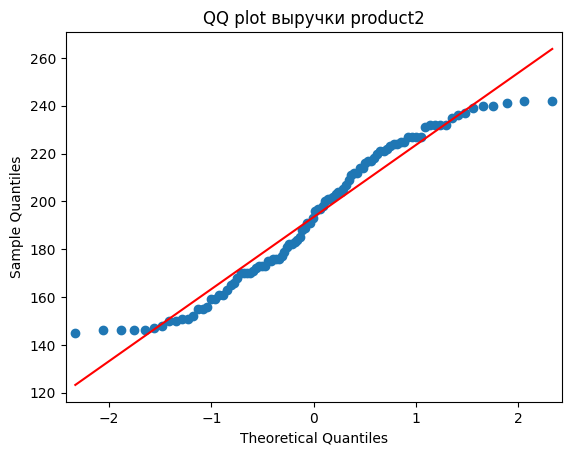

In [45]:


sm.qqplot(np.array(product1), line='r')
plt.title('QQ plot выручки product1')
plt.show()

sm.qqplot(np.array(product2), line='r')
plt.title('QQ plot выручки product2')
plt.show()

#Продукт 1 имеет нормальное распределение в отличие от продукта 2 которое имеет точки на графике которые имеют переиодическое 
# отклонение от диагональной линии.

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

(array([7., 5., 5., 3., 3., 9., 6., 5., 3., 4., 4., 5., 4., 4., 5., 5., 9.,
        5., 3., 6.]),
 array([145.  , 149.85, 154.7 , 159.55, 164.4 , 169.25, 174.1 , 178.95,
        183.8 , 188.65, 193.5 , 198.35, 203.2 , 208.05, 212.9 , 217.75,
        222.6 , 227.45, 232.3 , 237.15, 242.  ]),
 <BarContainer object of 20 artists>)

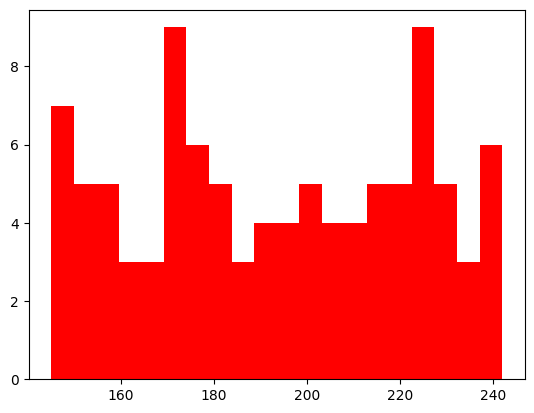

In [46]:
plt.hist(product2, bins = 20, color='red')
# чтобы значения стали нормально распределенными необходимо увеличить частоту выручки которе равное и близ лежащее к 
#среднему значению выручки ( в данном случае отсутствуют нормальное распределение)

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [47]:
standard_product1 = (np.array(product1) - mean) / std_dev


Нарисуйте kdeplot нового стандартного распределения

<Axes: ylabel='Density'>

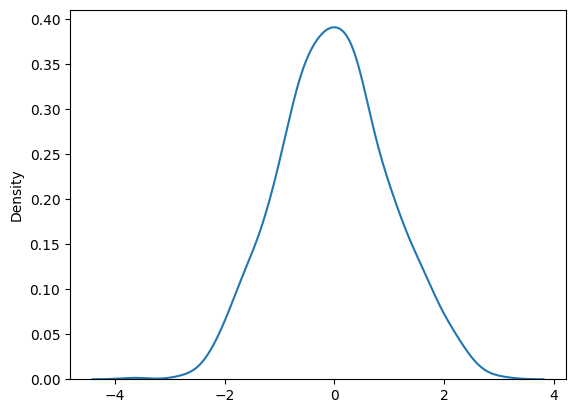

In [48]:
sns.kdeplot(standard_product1, label='Standard normal distribution')

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

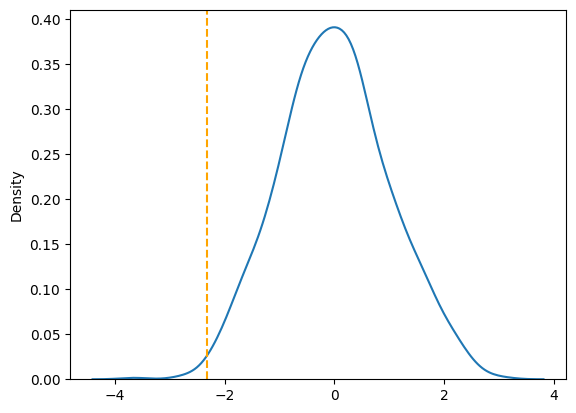

Точка 1% всей вероятности распределения равняется: -2.3263478740408408


In [49]:
quantile = norm.ppf(0.01)
sns.kdeplot(standard_product1)
plt.axvline(quantile, linestyle = '--', color='orange')
plt.show()
print(f"Точка 1% всей вероятности распределения равняется: {quantile}")

Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?

In [50]:
# сравнение значения -3.65 с квантилью уровня 0.01 (-2.33) указывает на то, что это значение находится еще дальше влево от среднего
#чем точка, где находится 1% всех значений в стандартном нормальном распределении. Это говорит о том, что значение 94 в исходном 
# распределении (перед преобразованием) является довольно экстремальным (очень низким) в сравнении с распределением после преобразования 
#в стандартное нормальное распределение

**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [51]:
avg_revenue = sum(product2) / len(product2)
print (avg_revenue)

print("Средняя выручка продукта 2:", avg_revenue)

193.5
Средняя выручка продукта 2: 193.5


Подсчитайте 95% доверительный интервал

Верхний доверительный интервал продукта 1: 246.46485692422084
Нижний доверительный интервал продукта 1: 151.74114307577915
Верхний доверительный интервал продукта 2: 194.99771342095553
Нижний доверительный интервал продукта 2: 188.63303960413168


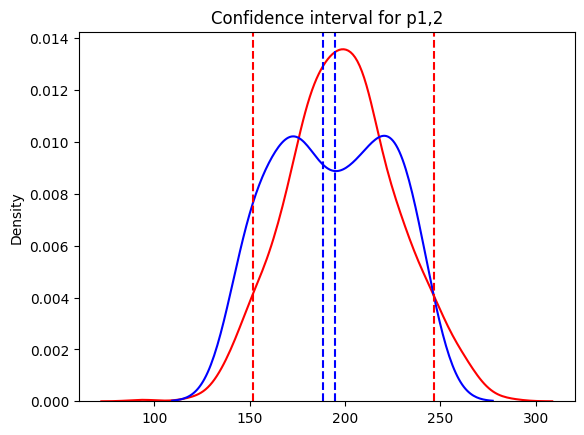

In [52]:
norm_dist_std_p1 = std_dev / np.sqrt(len(product1))

ul = norm.ppf(0.95, mean, std_dev)
ll = norm.ppf(0.05, mean, std_dev)

norm_dist_std_p2 = std_dev2 / np.sqrt(len(product2))

ul2 = norm.ppf(0.95, mean2, norm_dist_std_p1)
ll2 = norm.ppf(0.05, mean2, norm_dist_std_p2)
print(f"Верхний доверительный интервал продукта 1: {ul}")
print(f"Нижний доверительный интервал продукта 1: {ll}")
print(f"Верхний доверительный интервал продукта 2: {ul2}")
print(f"Нижний доверительный интервал продукта 2: {ll2}")

sns.kdeplot(product1, color='red', label='Confidence interval p1')
sns.kdeplot(product2, color='blue', label='Confidence interval p2')
plt.title('Confidence interval for p1,2')

plt.axvline(ul, linestyle='--', color='red')
plt.axvline(ll, linestyle='--', color='red')
plt.axvline(ul2, linestyle='--', color='blue')
plt.axvline(ll2, linestyle='--', color='blue')




**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

1.760483899730965
0.039315878320872244


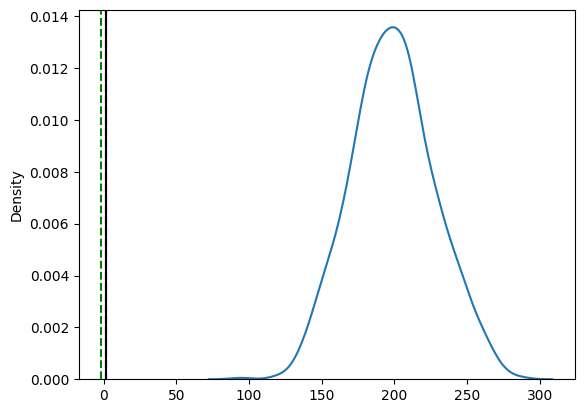

In [53]:
# H0 = Выручка у продукта1 равна 197.5 
# H1 = Выручка у продукта1 выше чем 197.5
size = len(product1)
dof = size - 1
t_stat = (mean - 197.5) / norm_dist_std_p1
print(t_stat)
print (1 - t.cdf(t_stat,dof))
t5, t95, t90 = t.ppf([0.05,0.95,0.9], dof)
sns.kdeplot(product1)
plt.axvline(t5, linestyle = '--', label = '5%', color='green')
plt.axvline(t95, linestyle = '--', label = '95%', color='red')
plt.axvline(t90, linestyle = '--', label = '90%', color='blue')
plt.axvline(t_stat, linestyle = '-', label = 't-stat', color='black')
plt.show()
# статистически значимый результат - нулевая гипотеза должна быть отклонена есть право предположить что выручка продукта1 выше чем 197.5
 # вероятность что выручка продукта1 равна 197.5 приравнивается к случайности

Какой это был типа АБ теста?

In [54]:
#Выборка против значения  - так как у нас одна выборка продукт 1 и мы сравниваем его со значением выручки 197.5
#односторонний так как мы в альтернативной гипотезе верим что значние выручки продукта 1 больше чем 197.5 (но говорим что)
# оно вовсе не равно 197.5


**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

1.0957774687625488e-09


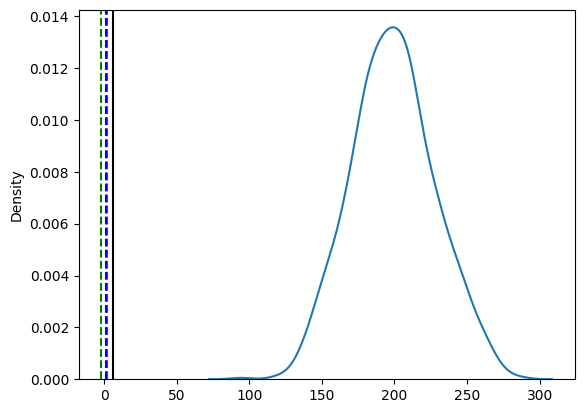

In [55]:
# two tail test
# H0 = Выручка у продукта1 равна выручке продукта2
# H1 = Выручка у продукта1 не равна выручке продукта2
size = len(product1)
dof = size - 1
t_stat = (mean - mean2) / (norm_dist_std_p1)


print (2* (1 - t.cdf(t_stat,dof)))
t5, t95, t90 = t.ppf([0.025,0.975,0.9], dof)
sns.kdeplot(product1)
plt.axvline(t5, linestyle = '--', label = '2.5%', color='green')
plt.axvline(t95, linestyle = '--', label = '97.5%', color='red')
plt.axvline(t90, linestyle = '--', label = '90%', color='blue')
plt.axvline(t_stat, linestyle = '-', label = 't-stat', color='black')

plt.show()


# статистически не значимый результат - нулевая гипотеза не может быть отклонена так как уровень P больше чем альфа 
# что говорит что вероятность что выручка у продукта 1 равна выручке продукта 2 не может быть случайностью
